# Week 05
## Images

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this week's exercises

In [1]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/image_utils.py

In [2]:
import matplotlib.pyplot as plt
import random

from PIL import Image

from image_utils import blur, edges, make_image, open_image

## Images as lists of lists of pixels

Just a quick review of how images are usually represented and stored in files and memory.

An image:<br>
<img src="./imgs/pixel-00.jpg" height="250px">

is a collection of rows:<br>
<img src="./imgs/pixel-01.jpg" height="250px">

which are collections of pixels:<br>
<img src="./imgs/pixel-03.jpg" height="250px">

which are lists of color values:<br>
<img src="./imgs/pixel-04.jpg" height="250px">



### Loading image files

We can use the `Image` object from the [PIL](https://pillow.readthedocs.io/en/stable/) library to open image files.

It's as simple as doing:

In [3]:
mimg = Image.open("./data/hog.jpg")

Now `mimg` is an image object and we can get some information about our image directly from this object.

### Image properties

<img src="./imgs/image-00.jpg" width="720px">

For example, to get its dimensions, in pixels, we can access its `size` variable, which holds $2$ values:

In [8]:
image_width, image_height = mimg.size

print(image_width, "x", image_height)
print("total number of pixels:", image_width * image_height)

1000 x 600
total number of pixels: 600000


And, to get the number of channels we can call its `getbands()` function:

In [9]:
channel_count = len(mimg.getbands())
print(mimg.getbands())
print(channel_count, "channels")

('R', 'G', 'B')
3 channels


### About channels

Grayscale images have $1$ channel: each pixel holds a value between $0$ and $255$ that represents how bright that pixels is.

RGB images have $3$ channels: each pixel is represented by $3$ values, one for each of the colors red, green and blue.

RGBA images have $4$ channels: each pixel has $3$ values for its RGB components, plus an extra one for transparency.

<img src="./imgs/image-01.jpg" width="720px">

This is important because when we get the list of pixels for an image we need to know what to expect from each of the list's members.

### Visualize the image

We can just call the built-in notebook function `display()`

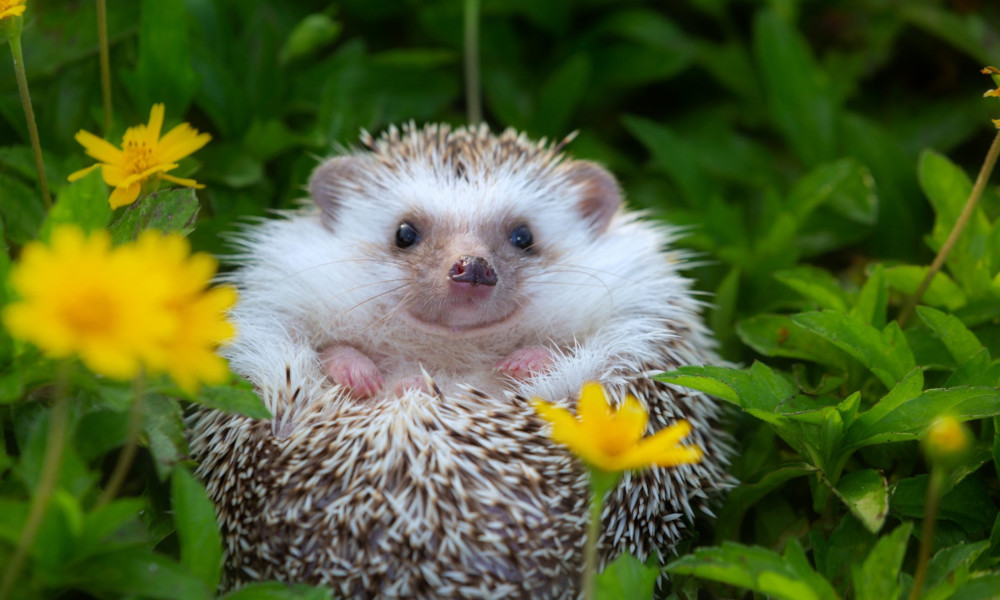

In [10]:
display(mimg)

### Get info for another image

Either upload a different image to the notebook, or open up the `data/flowers.jpg` image and print out its width, height, total number of pixels and number of channels.

In [ ]:
# TODO: open another image and print its properties
# TODO: display the second image

### Getting pixel color lists

We can also easily get a list of all the pixel color values by calling the object's `getdata()` member function and turning the result into a `list`.

This list has $width \times height$ elements, one for each pixel on the image, and when working with RGB images, each pixel element will have $3$ values.

We can take a look at some pixel values, and check that the length of the pixel array is equal to the $width$ of the image times its $height$.

In [11]:
img_pixels = list(mimg.getdata())

print(mimg.size, mimg.size[0] * mimg.size[1], len(img_pixels))
print(img_pixels[:5])

(1000, 600) 600000 600000
[(216, 152, 3), (206, 141, 0), (201, 135, 0), (205, 137, 0), (208, 142, 4)]


Even though we view our images as two-dimensional arrangements of colors, in memory and in files, they're just long lists of numbers.

<img src="./imgs/image-02.jpg" width="720px">

And, just like with audio files, we can create or manipulate these numeric lists before viewing them as images.

### Creating images from pixel color lists

This is a bit trickier.

We first have to create an empty image with a given size and specific number of channels, and then pass a list of pixel values to fill it:

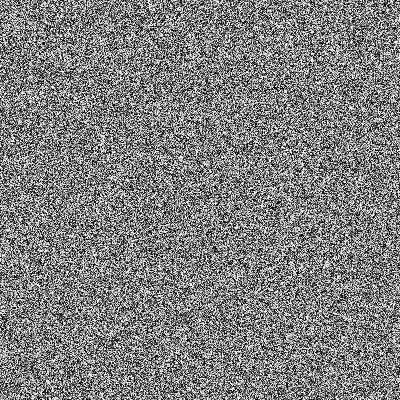

In [12]:
# This creates an empty grayscale image with size 400 x 400
rimg = Image.new("L", (400, 400))

# This fills a list with 400 * 400 random values between 0 and 255
rpix_vals = []
for i in range(400 * 400):
  rpix_vals.append(random.randint(0, 255))

# This puts the pixel values into the image object, so we can visualize it
rimg.putdata(rpix_vals)
display(rimg)

### An RGB example

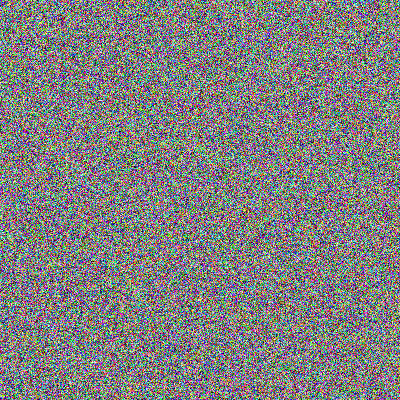

In [13]:
# This creates an empty, 3-channel, RGB image with size 400 x 400
rimg = Image.new("RGB", (400, 400))

# This fills a list with 400 * 400 random RGB values
rpix_vals = []
for i in range(400 * 400):
  r = random.randint(0, 255)
  g = random.randint(0, 255)
  b = random.randint(0, 255)
  rpix_vals.append((r, g, b))

# This puts the pixel values into the image object, so we can visualize it
rimg.putdata(rpix_vals)
display(rimg)

## 😵‍💫😖

And, just like with audio files and sample lists, it's kind of annoying to always be turning pixels into images and images into pixels like this.

Additionally, if the content of the pixel list passed to the function doesn't match the expected number of pixels or channels, the conversion will fail.

Luckily, we can use some helper functions to make this easier.

### Images and Pixels

We'll use the function `open_image(path)` to open the image at the specified file location. This will give us a `PIL.Image` object, with all of the properties we saw above, plus some added features.

This object has a `pixels` member variable that holds its list of pixel values, and an `update_pixels(pxs)` member function for updating the image based on a new array of pixels.

image size: (1000, 600) pixel count: 600000
first 5 pixels: [(216, 152, 3), (206, 141, 0), (201, 135, 0), (205, 137, 0), (208, 142, 4)]


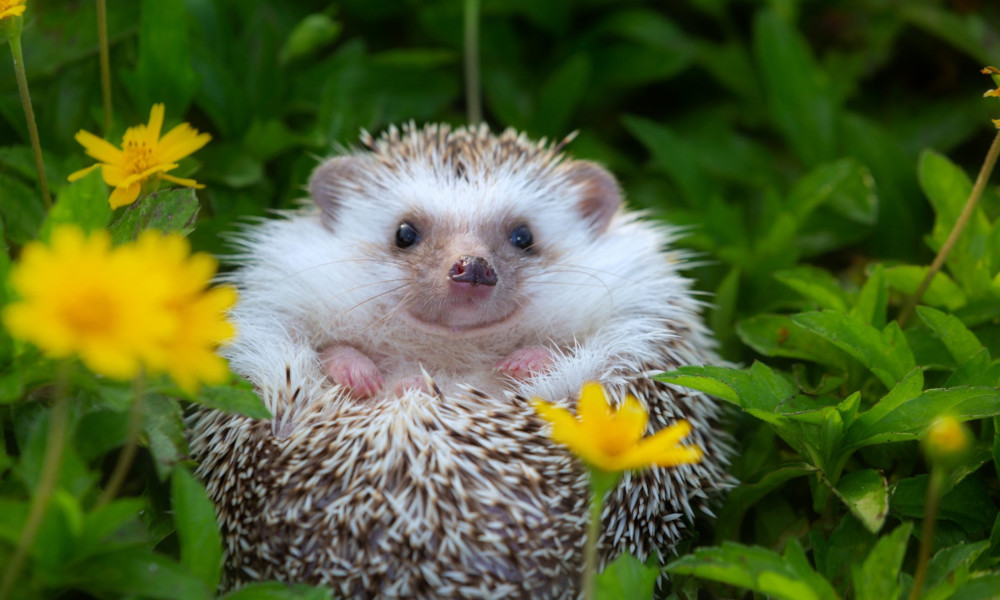

In [14]:
himg = open_image("./data/hog.jpg")
hpxs = himg.pixels

print("image size:", himg.size, "pixel count:", len(hpxs))
print("first 5 pixels:", hpxs[:5])

display(himg)

### Other ways of creating images

We can also copy an image, or create an image from a list of pixel values.

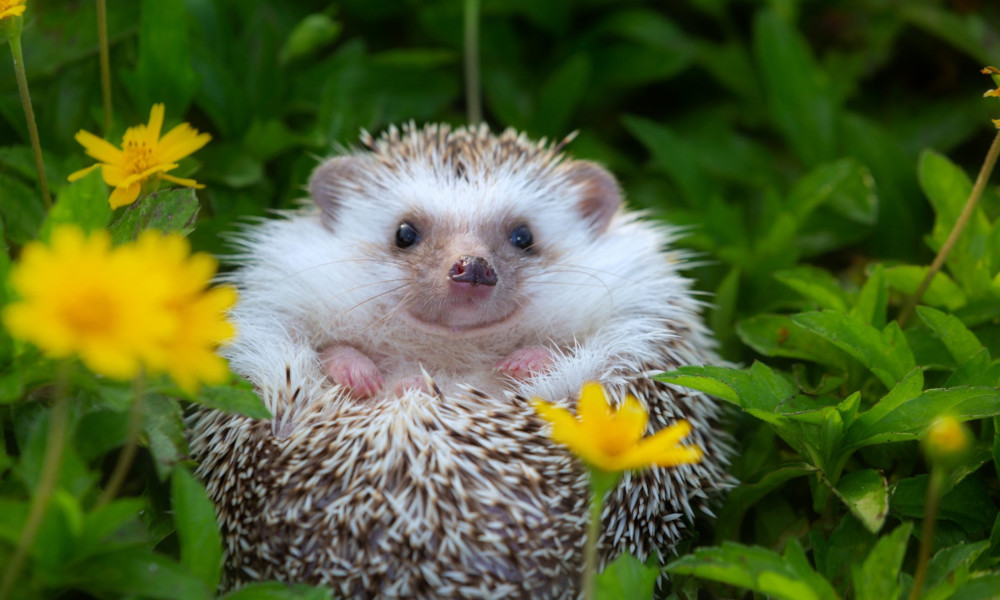

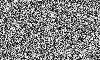

In [15]:
himg_copy = himg.copy()

pxs = [random.randint(0,256) for i in range(60*100)]
img_from_pxs = make_image(pxs, 100)

display(himg_copy)
display(img_from_pxs)

### Manipulating pixels

Once we change an image's pixel array we have to call `update_pixels()` on the image:

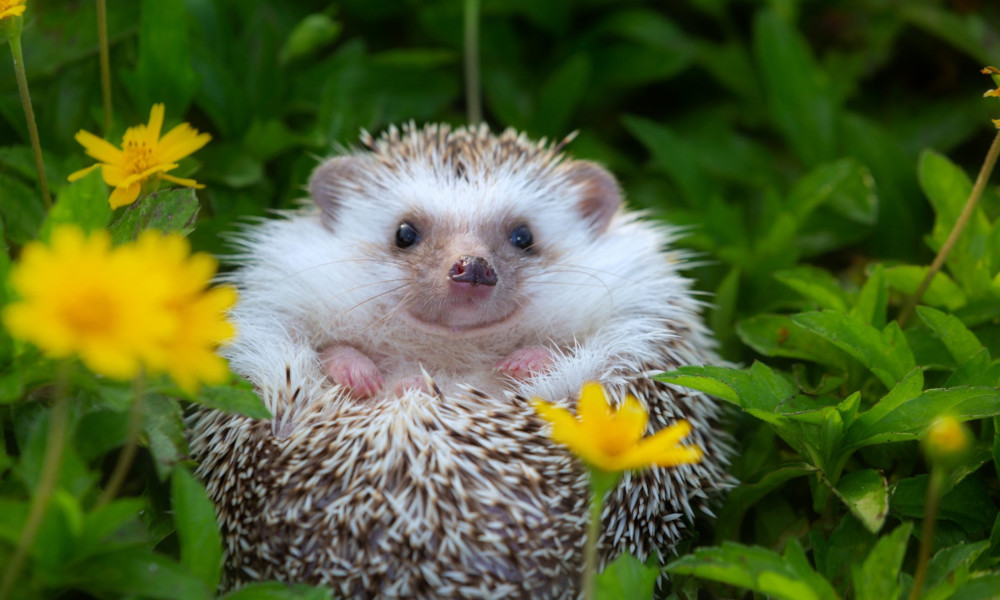

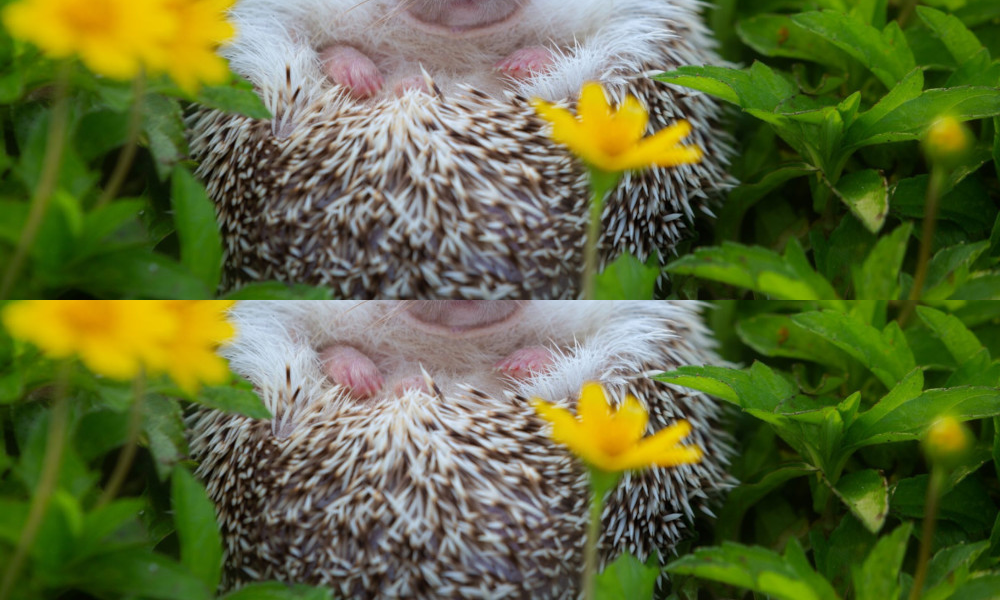

In [16]:
mid_idx = len(himg_copy.pixels) // 2

for idx in range(0, mid_idx):
  himg_copy.pixels[idx] = himg_copy.pixels[mid_idx + idx]

display(himg_copy)
himg_copy.update_pixels()
display(himg_copy)

We can also call `update_pixels()` with a list as a parameter if we already have a list of pixel values from some other operation.

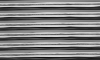

In [17]:
num_pxs = len(img_from_pxs.pixels)

img_from_pxs.update_pixels(himg_copy.pixels[:num_pxs])

display(img_from_pxs)

### Reopen the flowers image (or some other image)

Get a pixel list, but this time using the `open_image()` function and the `pixels` variable.

Print the number of pixels and the first $5$ pixel values.

Then, update some of its pixel values and display the changes.

first 5 pixels: [(158, 197, 196), (164, 200, 200), (169, 203, 204), (172, 203, 205), (173, 201, 204)]


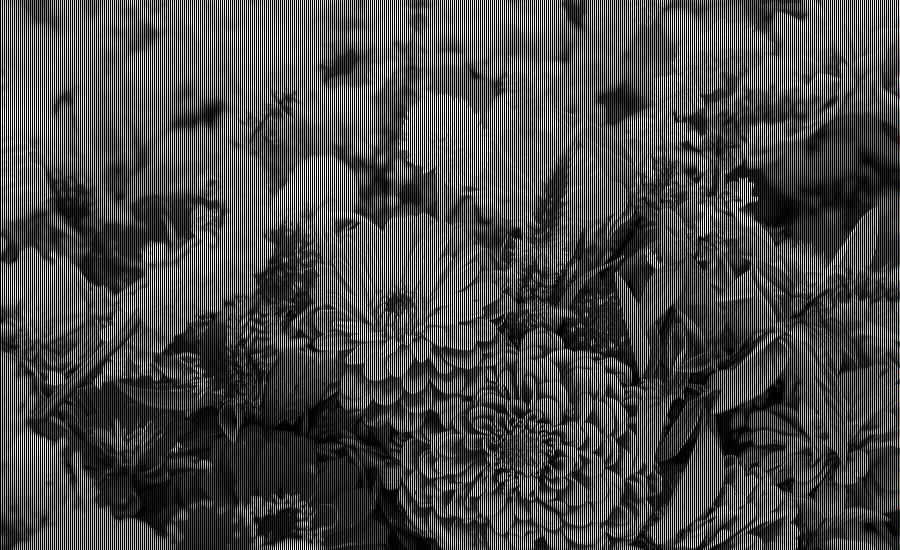

In [28]:
# TODO: open image using open_image() and get pixels with pixels member variable
# TODO: modify some of its pixel values and display the changes
flimg = open_image("./data/flowers.jpg")
flpxs = flimg.pixels

#for i, pixel in enumerate(flpxs):
#    if i % 2 == 0:
#        pixel = (0, 0, 0)
print("first 5 pixels:", flpxs[:5])
#display(flimg)

for pidx in range(len(flpxs)):
    if pidx % 2 == 0:
        flimg.pixels[pidx] = (0, 0, 0)

flimg.update_pixels()
display(flimg)


## Processing pixels

### Separating color channel

We can create new images by changing the values of the pixels in our list.

For example, if we want to separate the `red` component of our image, we can go through all of the pixel values and remove their `green` and `blue` components.

In [ ]:
himg = open_image("./data/hog.jpg")

# build array of new pixel values
redpxs = []
for r,g,b in himg.pixels:
  redpxs.append((r, 0, 0))

himg.update_pixels(redpxs)
display(himg)

We could've also done the above using a one-line list comprehension expression:

In [ ]:
himg = open_image("./data/hog.jpg")
redpxs = [(r, 0, 0) for r,g,b in himg.pixels]
himg.update_pixels(redpxs)
display(himg)

### Saving

If we create something we want to keep, we can save an image to a file by calling the `.save()` function of an `Image` object.

In [ ]:
himg.save("./data/redhog.jpg")

### Remove greens

Go through the original pixels and remove the green pixel values.

In [ ]:
# TODO: display an image with only the R and B channels

### Saturate colors

We can also saturate colors, by increasing the value of a chosen channel in every pixel.

In [ ]:
himg = open_image("./data/hog.jpg")
display(himg)

satpxs = []
for r,g,b in himg.pixels:
  # if the green channel is greater than the red and blue channels
  if (g - r) > 16 and (g - b) > 16:
    # make the green value 2 times larger
    satpxs.append((r, 2 * g, b))
  # else, keep original pixel values
  else:
    satpxs.append((r, g, b))

himg.update_pixels(satpxs)
display(himg)

### Exaggerate the yellows

How can we exaggerate the yellow flowers instead ?

We get yellow when the `red` and `green` values of our pixel are similar and much greater than the `blue` value.

First thing we have to do is detect the yellow pixels, then exaggerate their `red` and `green` values.

In [ ]:
# TODO: exaggerate the yellows

### RGB to grayscale

We can also remove colors by making the pixel have a single value equal to the average of its original RGB values.

$\displaystyle average = \frac{R + G + B}{3}$

This is a good way to estimate the luminosity of each pixel: brighter pixels will be white and darker pixels will be black.

In [ ]:
himg = open_image("./data/hog.jpg")

bwpxs = []
for r,g,b in himg.pixels:
  gval = (r + g + b) // 3
  bwpxs.append(gval)

himg.update_pixels(bwpxs)
display(himg)

### RGB to grayscale to gradient

We can change our original RGB image to have a gradient effect between two colors by first getting the luminosity of a pixel and using it to interpolate between two other colors.

In the code below, `lval` is a luminance value between $0$ and $255$, which makes our fade colors go from $(0, 0, 255)$ to $(255, 0, 255)$ (blue to pink).

In [ ]:
himg = open_image("./data/hog.jpg")

fadepxs = []
for r,g,b in himg.pixels:
  lval = (r + g + b) // 3
  fadepxs.append((lval, 0, 255))

himg.update_pixels(fadepxs)
display(himg)

### Filtering by Color

Let's say we're working on a vegetation detector and we want to be able to separate the pixels that represent plants and flowers from pixels that represent animals and other things.

We can start by creating a filter to separate the green pixels from our original image.

This is different than looking at the `green` color channel, or removing the `red` and `blue` channels, or exaggerating the green pixels.

In order to filter pixels of a certain color we have to go through the pixels and measure how similar they are to the color we wish to separate.

There are many ways to define "similar" when working with colors, but to keep it simple, let's define a `color_distance()` function that calculates the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between two colors:

$\displaystyle dist = \sqrt{\left(R_0 - R_1\right)^2 + \left(G_0 - G_1\right)^2 + \left(B_0 - B_1\right)^2}$

In [ ]:
def color_distance(c0, c1):
  return ((c0[0] - c1[0])**2 + (c0[1] - c1[1])**2 + (c0[2] - c1[2])**2) ** 0.5

### Removing pixels

Now that we have a function for measuring color similarity we can go through the pixels and remove the ones that are very different from the color we want to keep. We'll remove pixels by turning them black with RGB value (0, 0, 0).

Since we're making some pretty significant changes to our image, let's keep a copy of the original. We can do this by just calling the `copy()` member function of an image object.

In [ ]:
himg = open_image("./data/hog.jpg")
fimg = himg.copy()

keep_color = (20, 180, 20)
thold = 120

filtpxs = []
for r,g,b in himg.pixels:
  if color_distance((r, g, b), keep_color) < thold:
    filtpxs.append((r, g, b))
  else:
    filtpxs.append((0, 0, 0))

fimg.update_pixels(filtpxs)

display(himg)
display(fimg)

### Filter other colors

How can we filter the image to keep only the flowers? Or to keep only the hedgehog?

It might help to define a `filter_color()` function here that takes an image and a color to keep as inputs, and returns another image with just the kept pixels ... while keeping the original image intact.

In [ ]:
# TODO: filter image to keep only flowers then filter image to keep only hedgehog

def filter_color(img, keep_color, thold=150):
  # TODO: fill this in
  return img

### Vegetation Filter

Now, what we actually want is to separate the image into two images, one with the hedgehog and another with the vegetation.

There are a couple of ways to achieve this.

One way to get the vegetation pixels in this case is to remove the hedgehog from the original image. We can do this by first getting the hedgehog pixels and then subtracting them from the original image, pixel by pixel, component by component.

We can use the `zip()` function to iterate through both pixel arrays at the same time and subtract their components.

In [ ]:
himg = open_image("./data/hog.jpg")

hog_img = filter_color(himg, (200,200,200), 200)

veget_pxs = []
for (r0,g0,b0), (r1,g1,b1) in zip(himg.pixels, hog_img.pixels):
  veget_pxs.append((r0-r1, g0-g1, b0-b1))

himg.update_pixels(veget_pxs)
display(himg)

# 🤔

This is ok.

The other way to separate the vegetation is to filter the green pixels into an array, then filter the yellow pixels into another array, and then add them together, pixel by pixel, component by component.

This works because we made the pixels we don't want black, or (0, 0, 0), so we can add green or yellow pixels to black without changing their color.

In [ ]:
# TODO: get a pixel array for the green pixels
# TODO: get a pixel array for the yellow pixels

# TODO: add green and yellow pixel arrays
#       zip() can help


# 🎉

### Counting pixels by colors

Now that we can separate pixels by color, we could use it to create an automatic deforestation sensor by separating and counting green pixels, and calculating the percentage of green areas on images.

We could implement a separate function to count the number of non-black pixels in an image after it has been filtered, but since our `filter_color()` function above already goes through all of the pixels in an image and detects pixels of specific colors, we can just create a modified version of it that counts those pixels and returns the ratio relative to the total number of pixels, instead of returning a filtered image.

We can call this new function `color_ratio()` and it will take and image, a color and a threshold as parameters, like the `filter_color()` function.

In [ ]:
# TODO: create color_ratio() function

def color_ratio(img, keep_color, thold=150):
  # TODO: modify the content of the filter_color() function
  return 0

We can try it out on a couple of forest images inside the `data/` directory.

In [ ]:
fimg = open_image("./data/forest-00.jpg")
display(fimg)

ffimg = filter_color(fimg, (0,200,0), 180)
display(ffimg)

green_ratio = color_ratio(fimg, (0,200,0), 180)
print(f"green %: {round(100 * green_ratio, 3)}")

### Try it out on some other images

There are $6$ other aerial forest images in the `data/` directory. Run the green pixel count code on them and see if the results make sense.

In [ ]:
# TODO: count green pixels in forest images

Once we start doing image analysis it's good to be able to extract different kinds of information from our images in case we want to categorize them, filter them further or retrieve them from large databases later.

This is kind of equivalent to how we extracted amplitude and frequency features from audio files.

### Dominant Channel

One feature we can easily extract from our images is the average value of each of its channels along with the average luminosity value.

This can be used to give us some idea about the dominant color or tones in an images.

In [ ]:
himg = open_image("./data/hog.jpg")

# array with 4 0s
hog_rgbl_sum = 4 * [0]

for r,g,b in himg.pixels:
  l = (r + g + b) // 3
  hog_rgbl_sum[0] += r
  hog_rgbl_sum[1] += g
  hog_rgbl_sum[2] += b
  hog_rgbl_sum[3] += l

hog_rgbl_avg = [s // len(himg.pixels) for s in hog_rgbl_sum]

hog_rgbl_avg

We can see that both the `green` and `red` channels have average values above the average luminosity value.

This makes sense since the image has a lot of green pixels, and the `red` channel contributes to the yellow and white pixels.

### Repeat for other image

Get the average value for each channel of a different image.

Maybe create a function...

Does the result make sense?

In [ ]:
# TODO: get average channel value for other image

def get_channel_avgs(pxs):
  # TODO: fill this in
  return []

In [ ]:
# TODO: run function

### Color Histograms

Color histograms are another useful method of analyzing images and extracting information about their color.

A histogram is just a concise way of seeing how many pixels have particular channel values. We'll go through an image's pixel array and count how many pixels have a $0$ for the `red` channel, how many have a $1$, a $2$, $3$, etc... and then we'll repeat this for the `green` and `blue` channels and for luminance.


In [ ]:
himg = open_image("./data/hog.jpg")

# create 4 arrays (RGB + luminance) with 255 0s, one for each possible value a pixel component can have
hog_hist_cnts = [256 * [0] for p in range(4)]

for r,g,b in himg.pixels:
  l = (r + g + b) // 3
  hog_hist_cnts[0][r] += 1
  hog_hist_cnts[1][g] += 1
  hog_hist_cnts[2][b] += 1
  hog_hist_cnts[3][l] += 1

In [ ]:
plt.plot(hog_hist_cnts[0], 'r')
plt.plot(hog_hist_cnts[1], 'g')
plt.plot(hog_hist_cnts[2], 'b')
plt.plot(hog_hist_cnts[3], color='#aaa')
plt.ylim((0, 10000))
plt.show()

### Get histogram for flower image

Maybe create some functions ... that can be reused later...

In [ ]:
# TODO: repeat process and draw histogram for flowers picture

def get_hist_counts(pxs):
  # TODO: fill this in
  return []

def plot_hist(rgbl_cnt, ylim=None):
  # TODO: fill this in
  plt.plot()

In [ ]:
# TODO: test functions

### Comparing histograms

Even though histograms can't by themselves tell us about the content of an image, comparing the most-frequent channel values in different images can tell us something about the images.

Let's get the most frequent value of each channel.

We'll do this by sorting `(value, count)` pairs by `count`.

And, we can get `(value, count)` pairs for our lists by simplify using the `enumerate()` function since the `value` here is the same as the index for each list.

Let's create a function to do this.

In [ ]:
def get_most_frequent(hist_counts):
  # to sort by the second element of an array or tuple
  def byCount(A):
    return A[1]

  # sort (value, count) pairs by count for each of the 4 histogram lists
  sorted_rgbl_cnt = [sorted(enumerate(hl), key=byCount, reverse=True) for hl in hist_counts]

  # grab the first element of the first (value, count) pair of each list
  top_rgbl = [shl[0][0] for shl in sorted_rgbl_cnt]

  return top_rgbl

In [ ]:
get_most_frequent(hog_hist_cnts), get_most_frequent(flo_hist_cnts)

# 🤔

What this tells us is that the hedgehog image is generally darker (all channel values and luminance are less than $100$) and `green` is possibly the brightest channel.

The flower picture is bright (luminance above $200$) and there are more bright `red` tones than any other tones.

### Repeat with other images

Plot histograms and get the average and most frequent channel values for $2$ other images.

In [ ]:
# TODO: repeat histogram for other images

### Edge Detection

We've looked at some techniques for getting color information from images, but images are more than just colors.

We might be interested in also quantifying the shapes and textures present in our images.

We can start by extracting the edges of shapes in our image. There are many ways of doing this, but the simplest way is to subtract our original image from a blurry version of it and threshold the result.

Since we are not so concerned with color at this point we should work with grayscale images.

Our overall algorithm will be something like:
- open an image
- make it black & white
- blur it
- subtract the blurry b&w pixels from the original b&w pixels
- threshold the result

Threshold means making slightly bright pixels really bright and all other pixels really dark.

Let's do this in steps:

#### Open an image and extract its pixels

We can use the `open_image()` function and the `pixels` member variable to open and extract pixels, and `display()` to show the image.

In [ ]:
# TODO: implement edge extraction algorithm
  # open an image and extract its pixels

mimg = ''''''
ipxs = ''''''

display(mimg)

#### Blur the image using `blur()`

And display it.

The `blur()` function takes an image object as a parameter and an optional second parameter that specifies the amount of blurring. It returns another image object.

Experiment with the parameter a little bit, but the default value is good for extracting edges.

Let's also get the pixels for the blurred image and display it with `display()`.

In [ ]:
# TODO: implement edge extraction algorithm
  # blur image with the blur() function

bimg = ''''''
bpxs = ''''''

display(bimg)

#### Make the images grayscale

We saw this a few cells back. We can average the `RGB` values to get a grey luminance value.

Get grayscale versions of the original image and the blurry image

Display the results.

In [ ]:
# TODO: implement edge extraction algorithm
  # make the image b&w

bwimg = mimg.copy()
bwbimg = bimg.copy()

# TODO: make b&w
bwpxs = ''''''
bwbpxs = ''''''

bwimg.update_pixels(bwpxs)
display(bwimg)

bwbimg.update_pixels(bwbpxs)
display(bwbimg)

#### Subtract the blurred pixels from the original pixel values

The `zip()` function might help iterate through the pixel arrays from both images at the same time.

Display the resulting image.

In [ ]:
# TODO: implement edge extraction algorithm
  # subtract blurry b&w image from original b&w image

simg = bwpxs.copy()

# TODO: subtract bwbpxs from bwpxs
spxs = ''''''

simg.update_pixels(spxs)
display(simg)

#### Threshold the resulting pixel values

We'll go through the array and check each pixel:<br>
if its luminance is greater than a threshold value, we'll make it $255$, otherwise we'll make it $0$.

We can start with a threshold value of $16$ and see what happens.

In [ ]:
# TODO: implement edge extraction algorithm
  # threshold pixel values

timg = simg.copy()

# TODO: threshold pixels
tpxs = ''''''

timg.update_pixels(tpxs)
display(timg)

Great !

### Let's repeat it for a different image

First, create a function that takes an image as a parameter and returns another image with edge information.

In [ ]:
# TODO: create edge extraction function

def edge(img, rad=1, thold=16):
  # TODO: fill this in
  return img

In [ ]:
# TODO: use function

### Count edges

It helps to have a single value that we can use to compare edge information between images.

Let's create a function that counts the number of white pixels in an edge-extraction image.

We'll divide this number by the number of pixels in the image to get a rough idea of how _edgy_ any image is.

In [ ]:
def edge_ratio(img, rad=1, thold=16):
  eimg = edge(img, rad=rad, thold=thold)
  sum255 = sum([1 for rgb in eimg.pixels if rgb[0] == 255])
  npxs = len(eimg.pixels)
  return round(sum255 / npxs, 4)

mimg = open_image("./data/hog.jpg")
display(edge(mimg, 2))
edge_ratio(mimg, 2)

### Count edges for different images

Do the results make sense? Why did we divide the sum by the total number of pixels?

In [ ]:
# TODO: run the edge_ratio() function on a few images